In [1]:
using MAT
using Images, Colors

# Import the data from the .mat files
data = matread("data/ex3data1.mat")

Dict{String,Any} with 2 entries:
  "X" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 …
  "y" => [10.0; 10.0; … ; 9.0; 9.0]

In [4]:
images = data["X"]
numbers = data["y"]

5000×1 Array{Float64,2}:
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
 10.0
  ⋮  
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0
  9.0

In [5]:
# Reshape one row of the training example into a square matrix
function restore(row::Array{Float64, 1})
    width = convert(Int64,sqrt(length(row)))
    return reshape(row, width, width)
end


restore (generic function with 1 method)

In [6]:
img_array = restore(images[1, :])

20×20 Array{Float64,2}:
 0.0  0.0  0.0   0.0           0.0          …   0.0          0.0  0.0
 0.0  0.0  0.0   0.0           0.0              0.0          0.0  0.0
 0.0  0.0  0.0   0.0           0.0              0.0          0.0  0.0
 0.0  0.0  0.0   0.0           0.0              0.0          0.0  0.0
 0.0  0.0  0.0   0.0           0.0              0.0          0.0  0.0
 0.0  0.0  0.0   0.0           0.0          …   6.20939e-18  0.0  0.0
 0.0  0.0  0.0   0.0           0.000116422      0.000672618  0.0  0.0
 0.0  0.0  0.0   8.5606e-6     0.000120052     -0.0113151    0.0  0.0
 0.0  0.0  0.0   1.94036e-6   -0.0140445       -0.0354641    0.0  0.0
 0.0  0.0  0.0  -0.000737439  -0.0284542       -0.0388215    0.0  0.0
 0.0  0.0  0.0  -0.00813404    0.0803827    …  -0.0371077    0.0  0.0
 0.0  0.0  0.0  -0.0186104     0.26654         -0.0133525    0.0  0.0
 0.0  0.0  0.0  -0.0187413     0.273854         0.000990965  0.0  0.0
 0.0  0.0  0.0  -0.0187573     0.27873          4.89177e-5   0.0  

In [2]:
image_array = [0.0 0.0 0.000436411 -0.00310607 -0.0323305 0.130533 0.779865 1.02845 0.941862 1.00294; 0.0 1.28336e-17 -0.0039551 0.00752456 0.278203 0.781665 1.03677 1.01648 0.775148 0.605704; 0.000116422 -0.000326287 -0.0268537 0.17754 0.93672 1.02837 0.80449 0.880488 0.873632 0.327299; 0.000120052 -0.0138652 0.100755 0.79289 1.04321 0.757138 0.160587 0.392124 0.212778 -0.0322099; -0.0140445 0.0815652 0.642032 0.965627 0.598003 0.284667 -0.0138173 -0.0174122 -0.0172353 -0.0483053; -0.0284542 0.3828 1.03137 0.463166 -0.00359409 0.00486865 0.00214879 -0.000120098 0.0 -0.0434069; 0.0803827 0.85785 0.850969 0.0691721 -0.0216752 -0.00318689 -0.000212623 5.55215e-5 0.00109937 -0.0575151; 0.26654 1.0011 0.543122 -0.00364101 -0.00481022 0.0 0.000204248 -0.00223907 -0.0261794 0.0955674; 0.273854 0.969711 0.3426 -0.041218 6.16567e-5 0.000836493 -0.00685908 -0.0276068 0.122873 0.726513; 0.27873 0.930929 0.268919 -0.0501901 -0.0123773 -0.0370751 0.000431713 0.368645 0.830813 0.695367]

10×10 Array{Float64,2}:
  0.0           0.0           0.000436411  …   0.941862     1.00294  
  0.0           1.28336e-17  -0.0039551        0.775148     0.605704 
  0.000116422  -0.000326287  -0.0268537        0.873632     0.327299 
  0.000120052  -0.0138652     0.100755         0.212778    -0.0322099
 -0.0140445     0.0815652     0.642032        -0.0172353   -0.0483053
 -0.0284542     0.3828        1.03137      …   0.0         -0.0434069
  0.0803827     0.85785       0.850969         0.00109937  -0.0575151
  0.26654       1.0011        0.543122        -0.0261794    0.0955674
  0.273854      0.969711      0.3426           0.122873     0.726513 
  0.27873       0.930929      0.268919         0.830813     0.695367 

In [3]:
new_array = clamp01nan.(image_array)

10×10 Array{Float64,2}:
 0.0          0.0          0.000436411  …  1.0         0.941862    1.0      
 0.0          1.28336e-17  0.0             1.0         0.775148    0.605704 
 0.000116422  0.0          0.0             0.880488    0.873632    0.327299 
 0.000120052  0.0          0.100755        0.392124    0.212778    0.0      
 0.0          0.0815652    0.642032        0.0         0.0         0.0      
 0.0          0.3828       1.0          …  0.0         0.0         0.0      
 0.0803827    0.85785      0.850969        5.55215e-5  0.00109937  0.0      
 0.26654      1.0          0.543122        0.0         0.0         0.0955674
 0.273854     0.969711     0.3426          0.0         0.122873    0.726513 
 0.27873      0.930929     0.268919        0.368645    0.830813    0.695367 

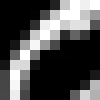

In [4]:
img = colorview(Gray, new_array)

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in grayim(::Array{Float64,2}) at /Users/JayWong/.julia/v0.5/ImageCore/src/deprecated.jl:6
 in include_string(::String, ::String) at ./loading.jl:441
 in execute_request(::ZMQ.Socket, ::IJulia.Msg) at /Users/JayWong/.julia/v0.5/IJulia/src/execute_request.jl:175
 in eventloop(::ZMQ.Socket) at /Users/JayWong/.julia/v0.5/IJulia/src/eventloop.jl:8
 in (::IJulia.##13#19)() at ./task.jl:360
while loading In[5], in expression starting on line 1


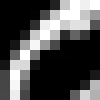

In [5]:
img = grayim(image_array)

In [4]:
Pkg.test("ImageMagick")

INFO: Computing test dependencies for ImageMagick...
INFO: Installing ZipFile v0.3.0
INFO: Testing ImageMagick


Binary png: Error During Test
  Got an exception of type ErrorException outside of a @test
  image coder signature mismatch `MIFF':      310 !=      210 @ error/module.c/OpenModule/1344
   in error(::ImageMagick.MagickWand) at /Users/JayWong/.julia/v0.5/ImageMagick/src/libmagickwand.jl:168
   in writeimage(::ImageMagick.MagickWand, ::String) at /Users/JayWong/.julia/v0.5/ImageMagick/src/libmagickwand.jl:265
   in save_(::String, ::Array{Bool,2}) at /Users/JayWong/.julia/v0.5/ImageMagick/src/ImageMagick.jl:141
   in #save#16(::Array{Any,1}, ::Function, ::String, ::Array{Bool,2}, ::Vararg{Array{Bool,2},N}) at /Users/JayWong/.julia/v0.5/ImageMagick/src/ImageMagick.jl:71
   in macro expansion; at /Users/JayWong/.julia/v0.5/ImageMagick/test/constructed_images.jl:16 [inlined]
   in macro expansion; at ./test.jl:672 [inlined]
   in macro expansion; at /Users/JayWong/.julia/v0.5/ImageMagick/test/constructed_images.jl:13 [inlined]
   in macro expansion; at ./test.jl:672 [inlined]
   in anonymou

ERROR: LoadError: LoadError: Some tests did not pass: 2 passed, 0 failed, 11 errored, 0 broken.
 in finish(::Base.Test.DefaultTestSet) at ./test.jl:495
 in macro expansion; at ./test.jl:679 [inlined]
 in anonymous at ./<missing>:?
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
 in include_from_node1(::String) at ./loading.jl:488
 in include_from_node1(::String) at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
 in process_options(::Base.JLOptions) at ./client.jl:262
 in _start() at ./client.jl:318
 in _start() at /Applications/Julia-0.5.app/Contents/Resources/julia/lib/julia/sys.dylib:?
while loading /Users/JayWong/.julia/v0.5/ImageMagick/test/constructed_images.jl, in expression starting on line 8
while loading /Users/JayWong/.julia/v0.5/ImageMagick/test/runtests.jl, in expression starting on line 1
=============================[ ERROR: Image

LoadError: ImageMagick had test errors